# Project Benson

*Project 1 of Metis Data Science Bootcamp.* Problem statement below:  


WomenTechWomenYes(WTWY) is interested in harnessing the power of data and analytics to optimize the effectiveness of our street team work, which is a significant portion of our fundraising efforts for our annual gala at the beginning of the summer each year.  
Where we’d like to solicit your engagement is to use MTA subway data, which as I’m sure you know is available freely from the city, to help us optimize the placement of our street teams, such that we can gather the most signatures, ideally from those who will attend the gala and contribute to our cause.    

In [211]:
import dateutil.parser
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import csv
from collections import defaultdict
import calendar
import seaborn
import warnings
warnings.filterwarnings('ignore')

Read in MTA for 8 weeks spanning April and May 2015 and get daily entries:

In [3]:
dates=['404','411','418','425','502','509','516','523']
file_list=[]
for d in dates:
    c=csv.reader(open("turnstile_data/turnstile_150{}.csv".format(d),"rb"))
    c=[[word.strip() for word in row] for row in c][1:]
    file_list.append(c)

#### Get total daily entries per TURNSTILE (SCP):

In [11]:
def turnstile(files):
    turnstile_dict=defaultdict(list)
    temp_dict=defaultdict(list)
    for row in files:
        temp_key=(row[0],row[1],row[2],row[3],dateutil.parser.parse(row[6])) 
        entries=int(row[9])
        temp_value=[entries]
        temp_dict[temp_key].append(entries)
    for k,v in temp_dict.items():
        turnstile_dict[k].append(max(v)-min(v))
    return turnstile_dict

In [158]:
turnstile_df=pd.DataFrame(turnstile(file_list[0]).keys())
turnstile_df['val']=turnstile(file_list[0]).values()

In [159]:
for i in range(1,len(file_list)):
    turnstile_temp=pd.DataFrame(turnstile(file_list[i]).keys())
    turnstile_temp['val']=turnstile(file_list[i]).values()
    turnstile_df=pd.concat([turnstile_df,turnstile_temp])

In [160]:
turnstile_df.columns=['C/A','UNIT','SCP','STATION','DATE','ENTRIES']
turnstile_df['ENTRIES']=turnstile_df['ENTRIES'].apply(lambda x: x[0])
turnstile_df['WEEKDAY']=[calendar.day_name[d.weekday()] for d in turnstile_df['DATE']]
turnstile_df.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,WEEKDAY
0,N020,R101,00-00-02,145 ST,2015-03-31,1938,Tuesday
1,A060,R001,00-00-02,WHITEHALL ST,2015-04-02,1472,Thursday
2,N192,R336,00-05-00,BEACH 60 ST,2015-03-29,0,Sunday
3,N130,R383,01-06-01,HUDSON-80 ST,2015-04-02,736,Thursday
4,N124,R103,00-03-00,BROADWAY-ENY,2015-04-03,951,Friday


#### Find stations with highest overall travel:

**Note:** I am indexing by the the Control Area as well since multiple stations are listed under the same name.

Grouping data by C/A and Station and keeping only the entries that are in Manhattan:

In [212]:
stationtotal=turnstile_df.groupby(['C/A','STATION'],as_index=False).mean()
stationtotal=stationtotal.sort(columns='ENTRIES',ascending=False)[:30]

NYC=['FULTON ST','161 ST-YANKEE','116 ST-COLUMBIA','59 ST','110 ST-CPN','CANAL ST',\
     '14 ST-6 AVE','TREMONT AVE','18 ST','WALL ST','66 ST-LINCOLN',\
     '34 ST-HERALD SQ','5 AVE-BRYANT PK','34 ST-PENN STA', 'W 4 ST-WASH SQ']

stationtotal=stationtotal[stationtotal['STATION'].isin(NYC)]
stationtotal=stationtotal[stationtotal['C/A']!='R205A']
stationtotal=stationtotal[stationtotal['C/A']!='N090']
stationtotal

,C/A,STATION,ENTRIES
506,R173,116 ST-COLUMBIA,3433944.157738
532,R206,FULTON ST,2785640.730159
564,R245,59 ST,2313685.683036
595,R301,110 ST-CPN,2189992.589286
381,N513,14 ST-6 AVE,2189505.125000
289,N203,161 ST-YANKEE,1917771.895604
472,R130,18 ST,716610.103571
23,A043,CANAL ST,597787.788961
297,N213,TREMONT AVE,539461.242545
529,R204,WALL ST,299851.551786


Plot total entries for highest travelled stations:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

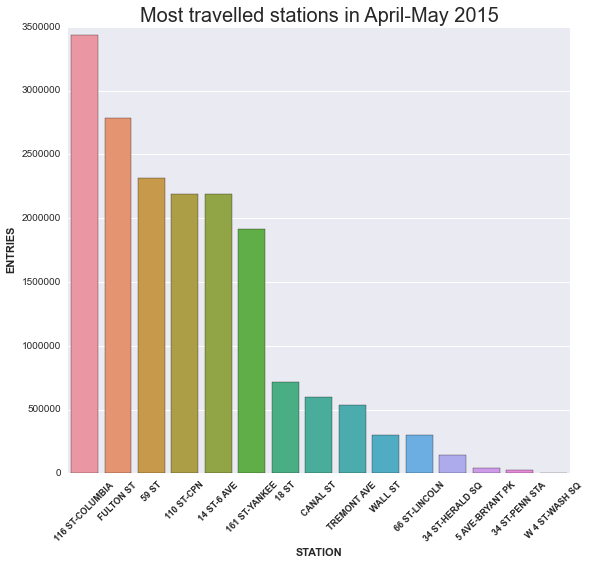

In [148]:
plt.figure(figsize=(9,8))
seaborn.barplot(stationtotal['STATION'],stationtotal['ENTRIES'])
plt.title('Most travelled stations in April-May 2015',fontsize=20)
plt.ylabel('ENTRIES',weight='bold')
plt.xlabel('STATION',weight='bold')
plt.xticks(rotation=45,fontsize=9,weight='bold')